In [117]:
%matplotlib inline


# Gaussian Mixture Model Ellipsoids


Plot the confidence ellipsoids of a mixture of two Gaussians
obtained with Expectation Maximisation (``GaussianMixture`` class) and
Variational Inference (``BayesianGaussianMixture`` class models with
a Dirichlet process prior).

Both models have access to five components with which to fit the data. Note
that the Expectation Maximisation model will necessarily use all five
components while the Variational Inference model will effectively only use as
many as are needed for a good fit. Here we can see that the Expectation
Maximisation model splits some components arbitrarily, because it is trying to
fit too many components, while the Dirichlet Process model adapts it number of
state automatically.

This example doesn't show it, as we're in a low-dimensional space, but
another advantage of the Dirichlet process model is that it can fit
full covariance matrices effectively even when there are less examples
per cluster than there are dimensions in the data, due to
regularization properties of the inference algorithm.



In [118]:
import itertools

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.image as mpimg

from sklearn import mixture

color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
                              'darkorange'])


def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(2, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    # plt.xlim(-9., 5.)
    # plt.ylim(-3., 6.)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)


# Number of samples per component
n_samples = 500

# Generate random sample, two components
np.random.seed(0)
C = np.array([[0., -0.1], [1.7, .4]])
X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
          .7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]
print(X.shape)

(1000, 2)


In [119]:
img = mpimg.imread('input/hm05.png')
X = np.column_stack(np.where(img > 0))
print(X.shape)
print(X)

(11795, 2)
[[ 74 404]
 [ 74 405]
 [ 74 406]
 ...
 [394 217]
 [394 218]
 [394 219]]


[[146.77781975 178.09613488]
 [307.26784591 512.72160024]
 [247.79992984 275.67518751]
 [150.00532291 457.99663498]
 [318.         231.        ]
 [297.9638035  400.6653957 ]
 [130.00000096 287.99999928]
 [295.71528872 134.73745856]
 [152.98206509 383.94583206]
 [159.17552835 140.59931618]
 [339.97010126 419.5380801 ]
 [157.         538.        ]
 [373.00005984 236.99984126]
 [108.99999928 107.99999989]
 [332.98779496 277.94452389]
 [255.45504725 212.94605566]
 [242.15747357 317.80256807]
 [259.         470.        ]
 [187.83430559 287.15694377]
 [ 81.         233.        ]
 [352.00000004 496.99999999]
 [377.73907246 397.77468598]
 [352.473713   122.4796707 ]
 [335.89356153 327.95787609]
 [243.          79.        ]
 [235.00000002 143.99999999]
 [187.         473.        ]
 [274.31787258 270.59547964]
 [ 80.         405.        ]
 [102.99999995 489.00000006]
 [152.36055649  86.32405383]
 [257.00000196 516.00000181]
 [370.00649482 195.31025742]
 [314.87176775 545.98960449]
 [107.        

/Users/aloschilov/workspace/gaussian_points/venv/lib/python3.7/site-packages/sklearn/mixture/base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


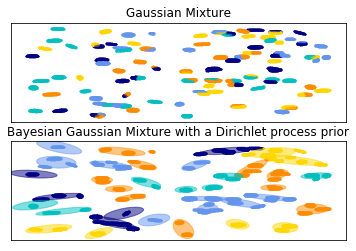

In [123]:
# Fit a Gaussian mixture with EM using five components
gmm = mixture.GaussianMixture(n_components=120, covariance_type='full').fit(X)
print(gmm.means_)

plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_, 0,
             'Gaussian Mixture')

# Fit a Dirichlet process Gaussian mixture using five components
dpgmm = mixture.BayesianGaussianMixture(n_components=120,
                                        covariance_type='full').fit(X)
plot_results(X, dpgmm.predict(X), dpgmm.means_, dpgmm.covariances_, 1,
             'Bayesian Gaussian Mixture with a Dirichlet process prior')

plt.show()